<a href="https://colab.research.google.com/github/itoshiyanazawa/cnn_project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1

1. Load the CIFAR-10 dataset (You can use libraries like TensorFlow/Keras or PyTorch to load
the dataset.)
2. Explore the dataset (e.g., visualize some images, check the class distribution).
3. Use proper transformation on your data if required.
4. Normalize the image data.
5. Split the data into training, validation and test sets.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# 1. Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. Combine train and test data
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

# 3. Function to split data equally
def split_data_equally(x, y, train_ratio=0.8):
    num_classes = 10
    indices = []
    for i in range(num_classes):
        idx = np.where(y == i)[0]
        np.random.shuffle(idx)
        split = int(len(idx) * train_ratio)
        indices.append((idx[:split], idx[split:]))

    train_indices = np.concatenate([i[0] for i in indices])
    val_indices = np.concatenate([i[1] for i in indices])

    np.random.shuffle(train_indices)
    np.random.shuffle(val_indices)

    return x[train_indices], y[train_indices], x[val_indices], y[val_indices]

# 4. Split the data
x_train, y_train, x_val, y_val = split_data_equally(x_all, y_all)

# 5. Verify class distribution
def count_classes(y):
    return np.bincount(y.flatten())

print("Train set class distribution:", count_classes(y_train))
print("Validation set class distribution:", count_classes(y_val))
print("Test set class distribution:", count_classes(y_test))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train set class distribution: [4800 4800 4800 4800 4800 4800 4800 4800 4800 4800]
Validation set class distribution: [1200 1200 1200 1200 1200 1200 1200 1200 1200 1200]
Test set class distribution: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [ ]:
print('Image size of x_train: ', x_train.shape)
print('Image size of x_val: ', x_val.shape)
print('Image size of x_test: ', x_test.shape)

Image size of x_train:  (48000, 32, 32, 1)
Image size of x_val:  (12000, 32, 32, 1)
Image size of x_test:  (10000, 32, 32, 1)


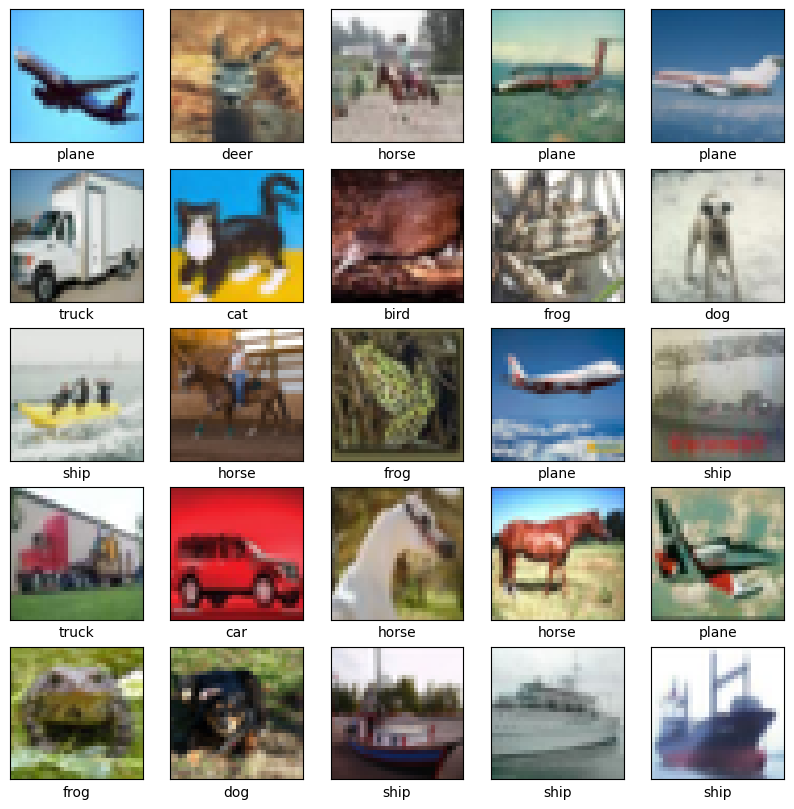

In [ ]:
# Visualize images
import matplotlib.pyplot as plt


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i][0]])
plt.show()



*   Do normalization before image transformation to keep image information secure



In [ ]:
# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0



*   Color is not important information in this case, object is important feature

*   Try color ones later to see improvement






In [ ]:
# Transform into grayscale
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)
x_val = tf.image.rgb_to_grayscale(x_val)

# Step 2
1. Define the CNN architecture (e.g., using Keras or PyTorch).
2. Explain what type of layers you are including and why (layers like Conv2D, MaxPooling2D,
Flatten, Dense, …)
3. Visualize your CNN architecture
4. Compile the model with appropriate loss function and optimizer. Explain your choice of loos
function and optimizer.
5. Train the model on the training data and validate it on the validation set.
6. Visualize the training process using both training and validation results.

In [ ]:
import keras
num_classes = 10
input_shape = (32, 32, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax')
    ]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 287,722 (1.10 MB)

 Trainable params: 287,722 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

**Why this architecture**

*   conv2D: To devide data into small pieces (kernel?), repeating it to learn increasingly complex and abstract representations
  *   By increaing the number of filters, it makes CNN learn images in detail (hierarical structure?)
*   ReLu: helps CNN learn non-linear relationship between features and images
*   max_pooling: To capture the most important features on each kernel
*   global_average_pooling: Enforces correspondence between feature maps and categories
*   dropout: To avoid overfitting to the training dataset
*   dense: To learn combination of features from the previous layers
*   softmax: To give probabilities for each class to choose the biggest value as output




In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

**Why these loss function and optimizer**


*   **SparseCategoricalCrossentropy**: This loss function is suitable for multi-class classification, like this 10 class clasification. It computes the cross-entropy loss between the true class labels and the predicted probabilities, ensuring that the model effectively learns to classify images into one of these distinct categories

*   **Adam**: This was chosen because of its adaptive learning rate capabilities, which make it effective for training CNN. Also, it requires less memory and high performance



In [ ]:
batch_size = 128
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint('model_at_epoch_{epoch}.keras'),
    keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2),
]

model.fit(
    x_train, y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (x_val, y_val),
    callbacks = callbacks,
)

score = model.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


375/375 ━━━━━━━━━━━━━━━━━━━━ 146s 381ms/step - accuracy: 0.2141 - loss: 2.0915 - val_accuracy: 0.4189 - val_loss: 1.6031
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 197s 368ms/step - accuracy: 0.4269 - loss: 1.6086 - val_accuracy: 0.5240 - val_loss: 1.3205
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 145s 376ms/step - accuracy: 0.5187 - loss: 1.3709 - val_accuracy: 0.5658 - val_loss: 1.2354
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 141s 372ms/step - accuracy: 0.5675 - loss: 1.2402 - val_accuracy: 0.6121 - val_loss: 1.0947
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 148s 389ms/step - accuracy: 0.6153 - loss: 1.1147 - val_accuracy: 0.6426 - val_loss: 1.0129
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 133s 356ms/step - accuracy: 0.6456 - loss: 1.0302 - val_accuracy: 0.6659 - val_loss: 0.9453
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 149s 375ms/step - accuracy: 0.6755 - loss: 0.9522 - val_accuracy: 0.6858 - val_loss: 0.9040
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 376ms/step - accuracy: 0.6857 - loss: 0.89